#Spacial joins

Examples of how to do spacial joins using GeoPandas

* Data used: City Council Districts and MapPluto (BBL polygons) from Bytes of the Big Apple (DCP)
* Find all the BBLs within District 35 using Spatial Join: 
    - Polygons and Polygons (intersects, within, contains)
    - Points and Polygons (intersects, within)

## Download and Read in the data

Download council shape files and the Brooklyn MapPLUTO from DCP's Bytes of the Big Apple website.
Both these are in ESRI shapefile format.

In [ ]:
%%bash
mkdir data/CityCouncilDist/
cd data/CityCouncilDist/
wget http://www1.nyc.gov/assets/planning/download/zip/data-maps/open-data/nycc16b.zip
unzip *.zip

In [ ]:
%%bash
mkdir data/BrooklynPluto
cd data/BrooklynPluto/
wget http://www1.nyc.gov/assets/planning/download/zip/data-maps/open-data/bk_mappluto_16v1.zip
unzip *zip

Use GDAL's (Geospacial Data Abstraction Library) ogrinfo to see how many layers are in the ESRI database files
http://www.gdal.org/ogrinfo.html

In [1]:
%%bash
ogrinfo data/CityCouncilDist/nycc_16b

INFO: Open of `data/CityCouncilDist/nycc_16b'
      using driver `ESRI Shapefile' successful.
1: nycc (Polygon)


In [2]:
%%bash
ogrinfo data/BrooklynPluto

INFO: Open of `data/BrooklynPluto'
      using driver `ESRI Shapefile' successful.
1: BKMapPLUTO (Polygon)
2: BK_Dcp_Mappinglot (Polygon)
3: bk_pluto (None)


### City Council District shape files

In [4]:
import geopandas as gpd
from geopandas.tools import sjoin

import pandas as pd
pd.options.display.max_columns=100

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10, 10)
plt.rcParams.update({'font.size': 18})

In [5]:
# since there is only one layer, don't need to specify layer when reading into geopandas
ccdist = gpd.read_file('data/CityCouncilDist/nycc_16b')
print ccdist.shape
ccdist.head()

(51, 4)


,CounDist,Shape_Area,Shape_Leng,geometry
0,7,5.141349e+07,50136.801092,"POLYGON ((1000758.421386719 241841.0704345703,..."
1,18,1.063663e+08,62043.938384,(POLYGON ((1019671.202636719 235750.5534057617...
2,21,1.323877e+08,78683.106148,"POLYGON ((1020311.051635742 225423.4711914062,..."
3,24,1.856074e+08,62126.651699,"POLYGON ((1043360.234191895 209261.3071899414,..."
4,35,8.150918e+07,57090.335714,"POLYGON ((996099.1724243164 190917.5881958008,..."


This dataset contains 51 rows, each labeled by the district number (CounDist). The geometry column contains the polygon mapping information for each district.

####Chloropleth map using the Council District number for the shading:

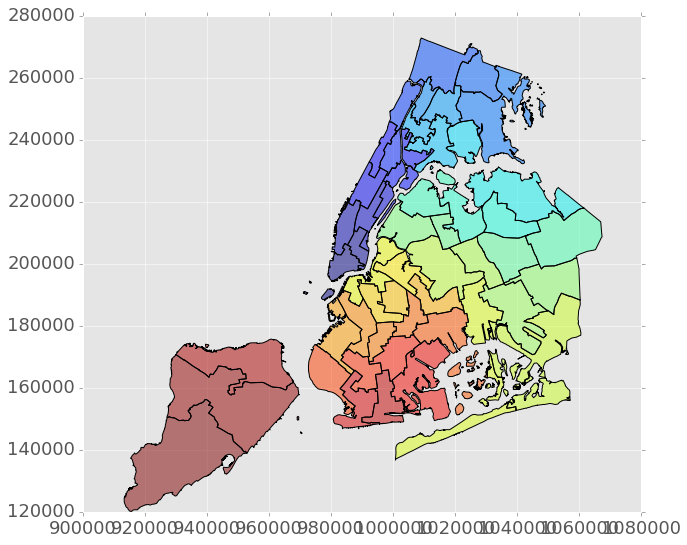

In [6]:
ccdist.plot(column='CounDist')

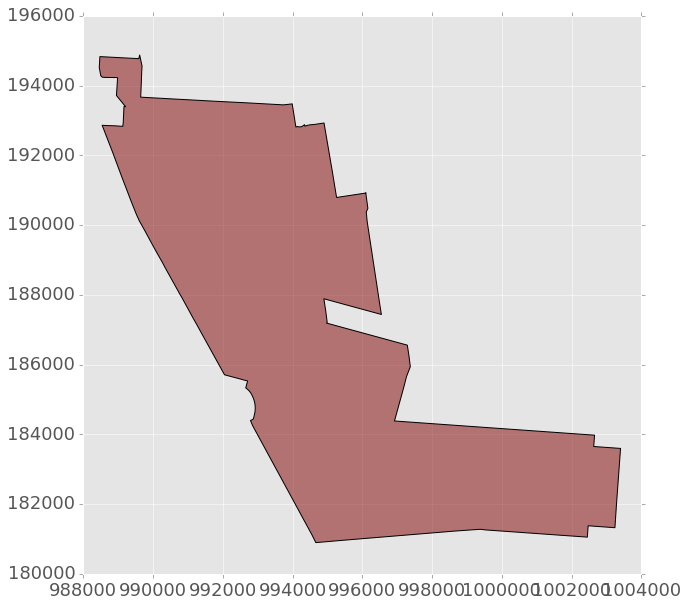

In [7]:
# singling out district 35 
dist35=ccdist[ccdist.CounDist.isin([35])]
dist35.plot()

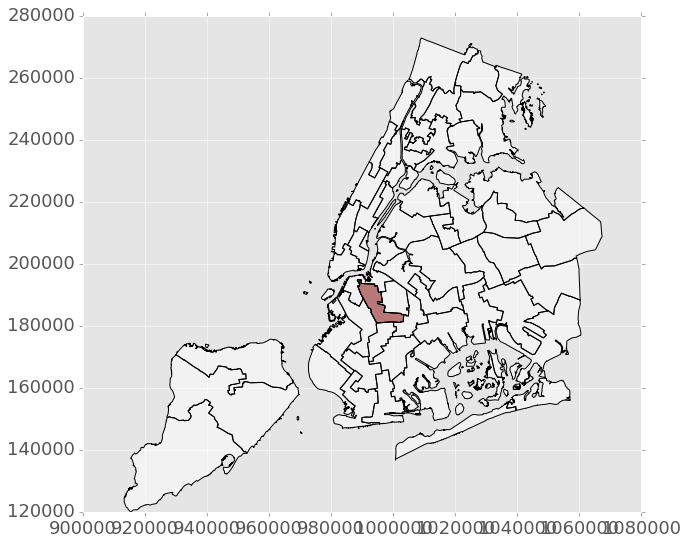

In [8]:
# plot district 35, with the rest of the districts as background
fig, ax = plt.subplots()
ax.set_aspect('equal')
ccdist.plot(ax=ax,color='white')
dist35.plot(ax=ax)

### MapPLUTO for Brooklyn
This has tax lot level shapefiles and PLUTO information for Brooklyn
Because of the complexity of the proprietary ESRI format, Geopandas (which is built with GDAL) can only read in one layer at a time. By default this is the first layer, but it can also be specified using the layer name.

In [9]:
mappluto = gpd.read_file('data/BrooklynPluto/',layer='BKMapPLUTO')
print mappluto.shape
mappluto.head()

(276930, 90)


,APPBBL,APPDate,Address,AllZoning1,AllZoning2,AreaSource,AssessLand,AssessTot,BBL,BldgArea,BldgClass,BldgDepth,BldgFront,Block,BoroCode,Borough,BsmtCode,BuiltCode,BuiltFAR,CB2010,CD,CT2010,ComArea,CommFAR,CondoNo,Council,EDesigNum,Easements,ExemptLand,ExemptTot,Ext,FacilFAR,FactryArea,FireComp,GarageArea,HealthArea,HistDist,IrrLotCode,LandUse,Landmark,Lot,LotArea,LotDepth,LotFront,LotType,LtdHeight,MAPPLUTO_F,NumBldgs,NumFloors,OfficeArea,OtherArea,Overlay1,Overlay2,OwnerName,OwnerType,PLUTOMapID,PolicePrct,ProxCode,ResArea,ResidFAR,RetailArea,SHAPE_Area,SHAPE_Leng,SPDist1,SPDist2,Sanborn,SanitBoro,SanitDist,SanitSub,SchoolDist,SplitZone,StrgeArea,TaxMap,Tract2010,UnitsRes,UnitsTotal,Version,XCoord,YCoord,YearAlter1,YearAlter2,YearBuilt,ZMCode,ZipCode,ZoneDist1,ZoneDist2,ZoneDist3,ZoneDist4,ZoneMap,geometry
0,0.000000e+00,None,1081 EAST 12 STREET,R5,None,2,35107.0,91336.0,3.067140e+09,2112,C3,48.0,22.00,6714,3,BK,5,None,0.60,3000,314,534,0,0.0,0,44,None,0,2360.0,2360.0,None,2.0,0,L156,0,7310,None,N,02,None,55,3500,100.0,35.00,5,None,0,1,2.0,0,0,None,None,"RAMBOD, SHAHROKH",None,1,70,0,2112,1.25,0,3421.921447,270.323044,None,None,313 040,3,14,4D,21,N,0,32006,0534,4,4,16v1,994376,166232,0,0,1931,None,11230,R5,None,None,None,22d,"POLYGON ((994429.5163999945 166222.5835999995,..."
1,3.035210e+09,10/23/1996,157 CHESTER STREET,C4-3,None,2,16827.0,24718.0,3.035210e+09,2955,B2,50.0,19.58,3521,3,BK,1,None,1.51,1005,316,924,0,3.4,0,41,None,0,1550.0,1550.0,None,4.8,0,L120,0,5900,None,N,01,None,112,1958,100.0,19.58,5,None,0,1,2.0,0,0,None,None,JOYCE MILLER,None,1,73,3,2955,2.43,0,2017.827636,240.532209,None,None,316 053,3,16,2A,23,N,0,31201,0924,2,2,16v1,1008947,182627,0,0,1995,None,11212,C4-3,None,None,None,17d,"POLYGON ((1008998.082800001 182627.6992000043,..."
2,0.000000e+00,None,65 EAST 95 STREET,R6,None,2,12291.0,64350.0,3.045980e+09,3502,C3,85.0,20.50,4598,3,BK,5,E,1.08,1000,317,884,0,0.0,0,41,None,0,0.0,0.0,G,4.8,0,E283,0,5810,None,N,02,None,64,3250,130.0,25.00,5,None,0,2,2.0,0,0,None,None,SYLVIA GWENDOLYN ASH,None,1,67,0,3502,2.43,0,3117.126286,307.209614,None,None,316 041,3,17,1A,17,N,0,31501,0884,4,4,16v1,1004844,181200,0,0,1930,None,11212,R6,None,None,None,17b,"POLYGON ((1004889.778200001 181247.4655999988,..."
3,0.000000e+00,None,156 MOFFAT STREET,R6,None,2,4716.0,17464.0,3.034460e+09,2160,B1,54.0,20.00,3446,3,BK,2,E,1.08,2002,304,411,0,0.0,0,37,None,0,1550.0,1550.0,None,4.8,0,Q252,0,3500,None,N,01,None,27,2000,100.0,20.00,5,None,0,1,2.0,0,0,None,None,ANTHONY ROBERTS,None,1,83,3,2160,2.43,0,2007.615215,241.745463,None,None,309 021,3,04,3A,32,N,0,31109,0411,2,2,16v1,1010124,189540,0,0,1910,None,11207,R6,None,None,None,17c,"POLYGON ((1010170.660400003 189517.8780000061,..."
4,0.000000e+00,None,2228 79 STREET,R5,None,2,7070.0,29859.0,3.062770e+09,1442,B9,39.5,19.50,6277,3,BK,1,E,0.72,1001,311,270,0,0.0,0,44,None,0,1550.0,1550.0,None,2.0,0,E253,0,8300,None,N,01,None,18,2000,100.0,20.00,5,None,0,1,1.0,0,0,None,None,"GUAN, HUI TING",None,1,62,3,1442,1.25,0,1944.642241,237.284617,None,None,312 075,3,11,5C,21,N,0,31904,0270,2,2,16v1,987277,159781,0,0,1940,None,11214,R5,None,None,None,22d,"POLYGON ((987316.2714000046 159814.2085999995,..."


In [10]:
print mappluto.crs
print ccdist.crs

{u'lon_0': -74, u'datum': u'NAD83', u'y_0': 0, u'no_defs': True, u'proj': u'lcc', u'x_0': 300000, u'units': u'us-ft', u'lat_2': 41.03333333333333, u'lat_1': 40.66666666666666, u'lat_0': 40.16666666666666}
{u'lon_0': -74, u'datum': u'NAD83', u'y_0': 0, u'no_defs': True, u'proj': u'lcc', u'x_0': 300000, u'units': u'us-ft', u'lat_2': 41.03333333333333, u'lat_1': 40.66666666666666, u'lat_0': 40.16666666666666}


If the coordinate reference systems (CRS) didn't match, we would have to translate one into the other before doing a spacial join. Otherwise sjoin will give a warning message. Luckily they already match.

## Spacial joins
Geopandas spacial join (or sjoin) has three options: intersects, within, and contains 
+ intersects: when the two polygons intersect or touch each other in any manner. 
+ within: when the first polygon is contained within the second
+ countains: when the first polygon contains the second (this is identical to within but with the order switched)

The resulting sjoin dataframe takes the geometry from the first dataframe listed. (mappluto in the case below)

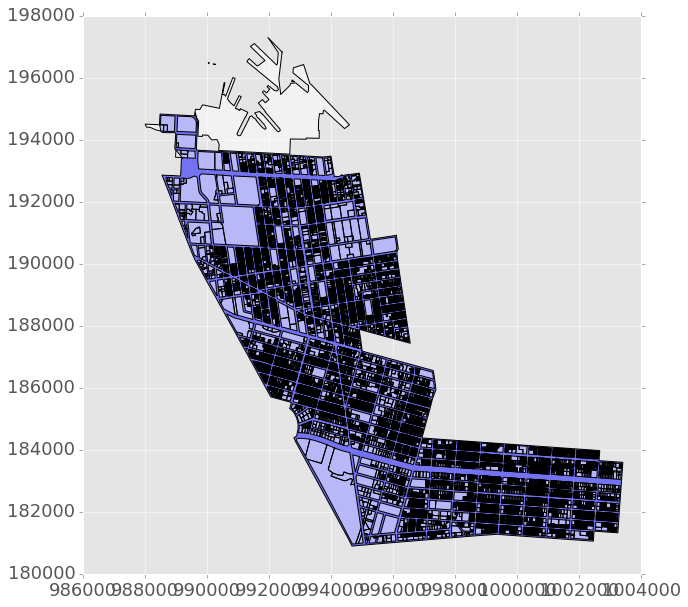

In [29]:
# Intersects: finding all the lots that intersect with district 35 from the city council district shapefiles
d35Inters = sjoin(mappluto,dist35,how='inner',op='intersects')

fig, ax = plt.subplots()
ax.set_aspect('equal')

dist35.plot(ax=ax,color='blue')
d35Inters.plot(ax=ax,color='white')

There are lots at the top which overlap or share a boundary with Dist 35, but do not fall completely with its boundaries.

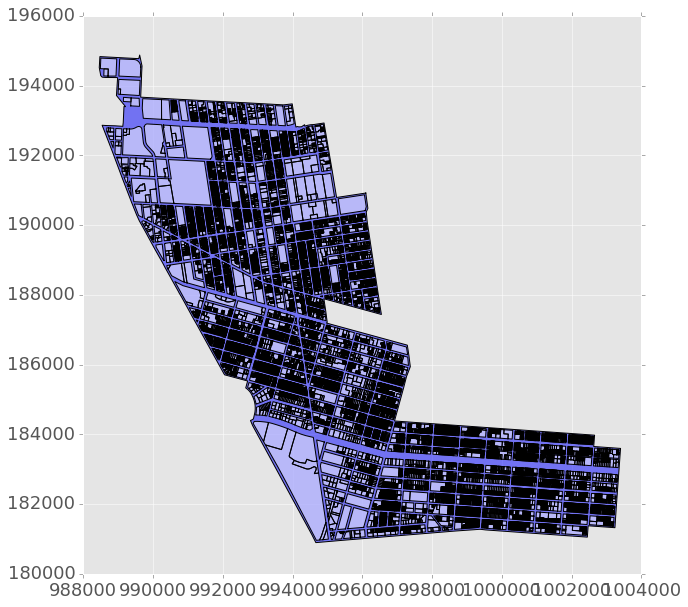

In [28]:
# Within: finding all the lots that fall within with district 35 from the city council district shapefiles
d35Within = sjoin(mappluto,dist35,how='inner',op='within')

fig, ax = plt.subplots()
ax.set_aspect('equal')

dist35.plot(ax=ax,color='blue')
d35Within.plot(ax=ax,color='white')

In [30]:
# 'Council' is the header in MapPluto, 'CounDist' is the header from the city council districts file
d35Within.groupby(['Council','CounDist']).count()[['BBL']]

,,BBL
Council,CounDist,
0,35,18
35,35,11966


looks like 18 bbls in MapPluto within the district 35 boundaries have an unknown '0' council district.

In [31]:
d35Inters.groupby(['Council','CounDist']).count()[['BBL']]

,,BBL
Council,CounDist,
0,35,18
33,35,3
35,35,11966


using 'intersects' gives three additional bbls, which are all actually in the 33 council district. 

In [32]:
d35Inters.head()

,APPBBL,APPDate,Address,AllZoning1,AllZoning2,AreaSource,AssessLand,AssessTot,BBL,BldgArea,BldgClass,BldgDepth,BldgFront,Block,BoroCode,Borough,BsmtCode,BuiltCode,BuiltFAR,CB2010,CD,CT2010,ComArea,CommFAR,CondoNo,Council,EDesigNum,Easements,ExemptLand,ExemptTot,Ext,FacilFAR,FactryArea,FireComp,GarageArea,HealthArea,HistDist,IrrLotCode,LandUse,Landmark,Lot,LotArea,LotDepth,LotFront,LotType,LtdHeight,MAPPLUTO_F,NumBldgs,NumFloors,OfficeArea,OtherArea,Overlay1,Overlay2,OwnerName,OwnerType,PLUTOMapID,PolicePrct,ProxCode,ResArea,ResidFAR,RetailArea,SHAPE_Area,SHAPE_Leng,SPDist1,SPDist2,Sanborn,SanitBoro,SanitDist,SanitSub,SchoolDist,SplitZone,StrgeArea,TaxMap,Tract2010,UnitsRes,UnitsTotal,Version,XCoord,YCoord,YearAlter1,YearAlter2,YearBuilt,ZMCode,ZipCode,ZoneDist1,ZoneDist2,ZoneDist3,ZoneDist4,ZoneMap,geometry,index_right,CounDist,Shape_Area,Shape_Leng
34,0.0,None,1208 CARROLL STREET,R6,None,2,20637.0,34934.0,3.012900e+09,3372,B9,55.0,20.00,1290,3,BK,1,E,0.83,2001,309,319,0,0.0,0,35,None,0,1550.0,1550.0,G,4.8,0,L132,0,4800,None,Y,01,None,19,4040,127.75,25.00,5,None,0,2,2.0,0,0,None,None,"LYNCH , CLIFTON",None,1,71,2,2248,2.43,0,4080.748058,368.531775,None,None,307 055,3,09,1A,17,N,0,30503,0319,2,2,16v1,998152,182236,0,0,1899,None,11225,R6,None,None,None,17b,"POLYGON ((998168.7370000035 182300.8014000058,...",4,35,8.150918e+07,57090.335714
37,0.0,None,1108 LINCOLN PLACE,C2-3/R6,None,2,10411.0,24064.0,3.012650e+09,2128,B1,50.0,20.00,1265,3,BK,2,E,1.06,2000,308,337,0,0.0,0,35,None,0,3380.0,3380.0,None,4.8,0,E234,0,4900,Crown Heights North III,N,01,None,38,2000,100.00,20.00,5,None,0,1,2.0,0,0,C2-3,None,"JAMES, MICHAEL",None,1,77,3,2128,2.43,0,2215.467457,247.566652,None,None,307 042,3,08,2B,17,N,0,30502,0337,2,2,16v1,1000909,183396,0,0,1910,None,11213,R6,None,None,None,17b,"POLYGON ((1000924.0792 183446.5778000057, 1000...",4,35,8.150918e+07,57090.335714
47,0.0,None,10 GRAND AVENUE,M1-2,None,2,90000.0,2635650.0,3.018770e+09,58905,F1,85.0,99.00,1877,3,BK,5,None,5.89,2002,302,543,58905,2.0,0,35,None,0,0.0,0.0,None,4.8,58905,L119,0,9300,None,N,06,None,30,10000,100.00,100.00,5,None,0,1,8.0,0,0,None,None,10 GRAND HOLDINGS LLC,P,1,88,0,0,0.00,0,10116.170356,402.323783,None,None,302 049,3,02,4E,14,N,0,30701,0543,0,3,16v1,993937,193295,0,0,1935,None,11205,M1-2,None,None,None,12d,"POLYGON ((993994.2660000026 193252.9912, 99389...",4,35,8.150918e+07,57090.335714
50,0.0,None,659 ST JOHNS PLACE,R5B,None,2,7275.0,15839.0,3.012450e+09,1294,A4,45.0,16.00,1245,3,BK,2,E,0.53,2001,308,219,0,0.0,0,35,None,0,1550.0,1550.0,None,2.0,0,E280,0,2900,None,N,01,None,71,2432,152.00,16.00,5,None,0,1,2.0,0,0,None,None,"IANDOVKA, VLADIMIR",P,1,77,2,1294,1.35,0,2588.058322,340.491770,None,None,307 034,3,08,1A,17,N,0,30502,0219,1,1,16v1,996382,184289,0,0,1910,None,11216,R5B,None,None,None,17a,"POLYGON ((996406.7613999993 184362.7041999996,...",4,35,8.150918e+07,57090.335714
93,0.0,None,253 KINGSTON AVENUE,C1-3/R6,None,2,1524.0,83539.0,3.012580e+09,3689,S9,55.0,19.42,1258,3,BK,2,E,2.38,2002,308,339,1229,0.0,0,35,None,0,0.0,0.0,None,4.8,0,E234,0,4900,None,N,04,None,12,1553,80.00,19.42,3,None,0,1,3.0,0,0,C1-3,None,ST. JOHNS 1102 REALTY,None,1,77,0,2460,2.43,1229,1731.302224,204.827665,None,None,307 042,3,08,2B,17,N,0,30502,0339,4,7,16v1,1000400,183748,0,0,1910,None,11213,R6,None,None,None,17b,"POLYGON ((1000441.2984 183756.265200004, 10004...",4,35,8.150918e+07,57090.335714


Reversing the order of the dataframes and using "contains" instead of "within" gives back the same number of lots. But this time the geometry is that of the city council district, so it will be exactly the same in every row. The lot level geometry is lost.

In [35]:
# Contains: dist35 'contains' these lots
dist35Cont = sjoin(dist35,mappluto,how='inner',op='contains')
print dist35Cont.shape
dist35Cont.head()

(11984, 94)


,CounDist,Shape_Area,Shape_Leng,geometry,index_right,APPBBL,APPDate,Address,AllZoning1,AllZoning2,AreaSource,AssessLand,AssessTot,BBL,BldgArea,BldgClass,BldgDepth,BldgFront,Block,BoroCode,Borough,BsmtCode,BuiltCode,BuiltFAR,CB2010,CD,CT2010,ComArea,CommFAR,CondoNo,Council,EDesigNum,Easements,ExemptLand,ExemptTot,Ext,FacilFAR,FactryArea,FireComp,GarageArea,HealthArea,HistDist,IrrLotCode,LandUse,Landmark,Lot,LotArea,LotDepth,LotFront,LotType,LtdHeight,MAPPLUTO_F,NumBldgs,NumFloors,OfficeArea,OtherArea,Overlay1,Overlay2,OwnerName,OwnerType,PLUTOMapID,PolicePrct,ProxCode,ResArea,ResidFAR,RetailArea,SHAPE_Area,SHAPE_Leng,SPDist1,SPDist2,Sanborn,SanitBoro,SanitDist,SanitSub,SchoolDist,SplitZone,StrgeArea,TaxMap,Tract2010,UnitsRes,UnitsTotal,Version,XCoord,YCoord,YearAlter1,YearAlter2,YearBuilt,ZMCode,ZipCode,ZoneDist1,ZoneDist2,ZoneDist3,ZoneDist4,ZoneMap
4,35,8.150918e+07,57090.335714,"POLYGON ((996099.1724243164 190917.5881958008,...",260998,0.000000e+00,None,66 CLIFTON PLACE,R6B,None,2,5695.0,23228.0,3.019520e+09,2700,B3,40.0,18.00,1952,3,BK,1,E,1.50,1001,302,231,0,0.0,0,35,None,0,0.0,0.0,None,2.0,0,E210,0,1300,None,N,01,None,10,1800,100.0,18.00,5,None,0,1,2.5,0,0,None,None,"WESOLOWSKI, KATRIN",None,1,88,3,1980,2.0,0,1727.635819,240.304425,None,None,302 064,3,02,3A,13,N,0,30702,0231,2,2,16v1,994807,189817,0,0,1899,None,11238,R6B,None,None,None,16c
4,35,8.150918e+07,57090.335714,"POLYGON ((996099.1724243164 190917.5881958008,...",143450,0.000000e+00,None,230 GREENE AVENUE,R6B,None,2,4296.0,17749.0,3.019660e+09,2856,C0,42.0,17.17,1966,3,BK,1,E,1.66,2000,302,231,0,0.0,0,35,None,0,0.0,0.0,None,2.0,0,E219,0,1300,None,N,02,None,11,1717,100.0,17.17,5,None,0,1,3.0,0,0,None,None,JEFFERSON SHILEEN P,None,1,88,3,2856,2.0,0,1920.140905,242.523950,None,None,302 064,3,02,3A,13,N,0,30703,0231,3,3,16v1,994809,189546,0,0,1910,None,11238,R6B,None,None,None,16c
4,35,8.150918e+07,57090.335714,"POLYGON ((996099.1724243164 190917.5881958008,...",233655,3.019660e+09,03/23/2015,11 LEXINGTON AVENUE,R6B,None,2,8615.0,88350.0,3.019660e+09,2858,C0,53.0,18.20,1966,3,BK,5,None,1.57,2000,302,231,0,0.0,0,35,None,0,0.0,0.0,None,2.0,0,E219,0,1300,None,N,02,None,80,1816,100.0,18.20,0,None,0,1,3.0,0,0,None,None,LEX GRAND HOLDINGS LL,None,1,88,0,2858,2.0,0,1810.315553,242.635123,None,None,302 064,3,02,3A,13,N,0,30703,0231,3,3,16v1,994814,189441,0,0,2013,None,11238,R6B,None,None,None,16c
4,35,8.150918e+07,57090.335714,"POLYGON ((996099.1724243164 190917.5881958008,...",82954,0.000000e+00,None,68 CLIFTON PLACE,R6B,None,2,12939.0,57459.0,3.019520e+09,3059,C3,45.0,18.00,1952,3,BK,5,None,1.70,1001,302,231,0,0.0,0,35,None,0,0.0,0.0,None,2.0,0,E210,0,1300,None,N,02,None,11,1800,100.0,18.00,5,None,0,1,2.5,0,0,None,None,CAITILIN ROSE,None,1,88,0,3059,2.0,0,2016.725698,245.842989,None,None,302 064,3,02,3A,13,N,0,30702,0231,4,4,16v1,994824,189820,2004,0,1905,None,11238,R6B,None,None,None,16c
4,35,8.150918e+07,57090.335714,"POLYGON ((996099.1724243164 190917.5881958008,...",119682,0.000000e+00,None,232 GREENE AVENUE,R6B,None,2,5375.0,16420.0,3.019660e+09,2144,B3,42.0,17.17,1966,3,BK,1,None,1.25,2000,302,231,0,0.0,0,35,None,0,0.0,0.0,None,2.0,0,E219,0,1300,None,N,01,None,12,1717,100.0,17.17,5,None,0,1,2.0,0,0,None,None,BRANDON WARD,None,1,88,2,2144,2.0,0,1865.072444,241.498552,None,None,302 064,3,02,3A,13,N,0,30703,0231,2,2,16v1,994827,189548,0,0,1901,None,11238,R6B,None,None,None,16c


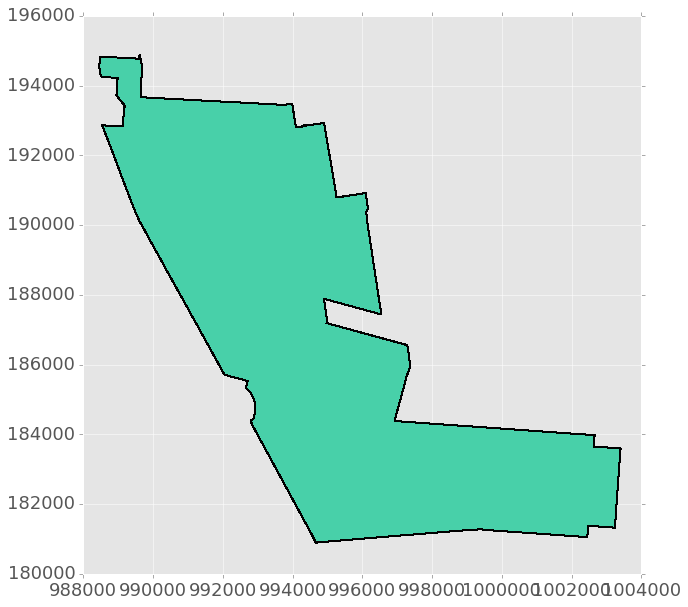

In [34]:
dist35Cont.plot()

It looks like one shape file, but it actually plotted out all 11,984 polygons which look exactly the same.

###Spacial Joins on Points in Polygon

So far we've done spacial joins on polygons. It can also be used to find out if points reside within a polygon.

We can use the centroid of the BBLs as our points, and the district 35 shape as our polygon.

In [47]:
# making a copy of mappluto
point = mappluto.copy()
# where the geometry is now the central point of the polygon
point['geometry']=mappluto.centroid

# points which intersect with dist35
d35IntersPts = sjoin(point,dist35,how='inner',op='intersects')
print d35IntersPts.shape

# points which lie within dist35
d35WithinPts = sjoin(point,dist35,how='inner',op='within')
print d35WithinPts.shape

(11985, 94)
(11985, 94)


In [48]:
d35IntersPts.groupby(['Council','CounDist']).count()[['BBL']]

,,BBL
Council,CounDist,
0,35,18
33,35,1
35,35,11966


In [49]:
d35WithinPts.groupby(['Council','CounDist']).count()[['BBL']]

,,BBL
Council,CounDist,
0,35,18
33,35,1
35,35,11966


results are very similar to using polygons, except there is one bbls which is not within the boundaries but it's centroid is.

In [50]:
%%timeit
sjoin(point,dist35,how='inner',op='intersects')

1 loops, best of 3: 10.3 s per loop


In [51]:
%%timeit
sjoin(point,dist35,how='inner',op='within')

1 loops, best of 3: 28.7 s per loop


In [52]:
%%timeit
sjoin(mappluto,dist35,how='inner',op='intersects')

1 loops, best of 3: 16 s per loop


In [53]:
%%timeit
sjoin(mappluto,dist35,how='inner',op='within')

1 loops, best of 3: 35.4 s per loop
